In [4]:
import numpy
import cv2
import matplotlib.pyplot as plt

## Input_output of Image

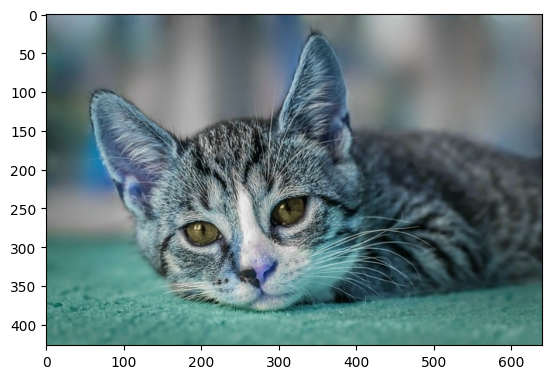

In [ ]:
# reading image
image_path = r"D:\Wetu_file\Teaching\Paragon\image_proceesing\dataset\cat.jpg"
image = cv2.imread(image_path)
plt.imshow(image)
plt.show()


In [7]:
#Save image
saving_path = r"D:\Wetu_file\Teaching\Paragon\image_proceesing\dataset\cat_copy.jpg"
cv2.imwrite(saving_path, image)


True

## Image Representation

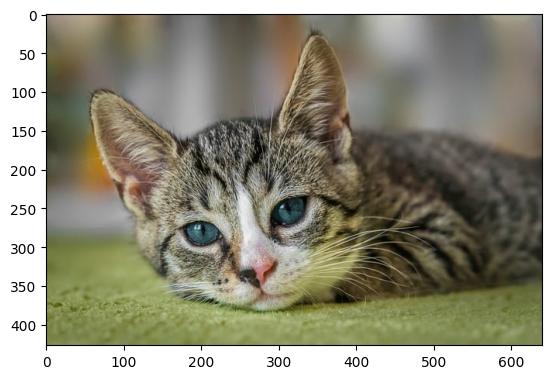

In [9]:
# convert image to rgb
rgb_img = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(rgb_img)
plt.show()

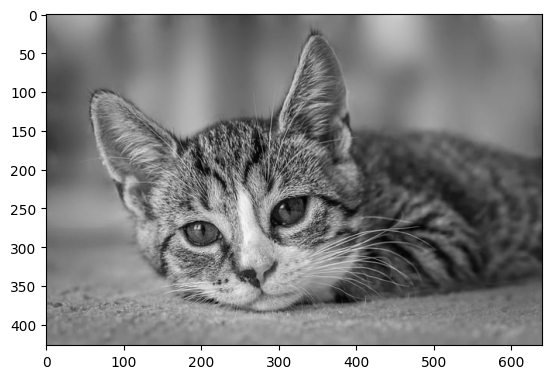

In [20]:
# convert image to grayscale
gray_img = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
plt.imshow(gray_img,cmap='gray')
plt.show()

## Video Record

In [21]:
#video recording
cap = cv2.VideoCapture(0)
while True:
    ret, frame = cap.read()
    cv2.imshow('frame',frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [26]:
save_path = r"D:\Wetu_file\Teaching\Paragon\image_proceesing\dataset\video.mp4"
cap = cv2.VideoCapture(0)
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(save_path,fourcc,20.0,(640,480))
while True:
    ret, frame = cap.read()
    out.write(frame)
    cv2.imshow('frame',frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
out.release()
cv2.destroyAllWindows()

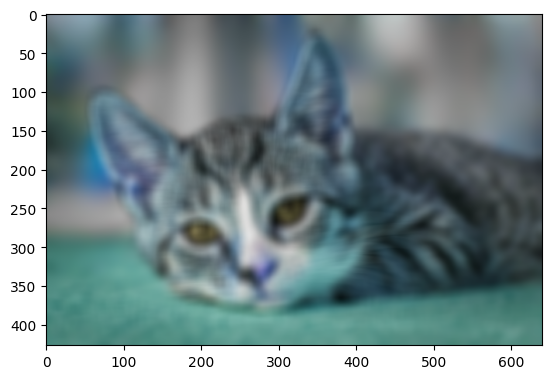

In [33]:
#Gaussian blur
blurred_image = cv2.GaussianBlur(image,(15,15),10)
plt.imshow(blurred_image)
plt.show()


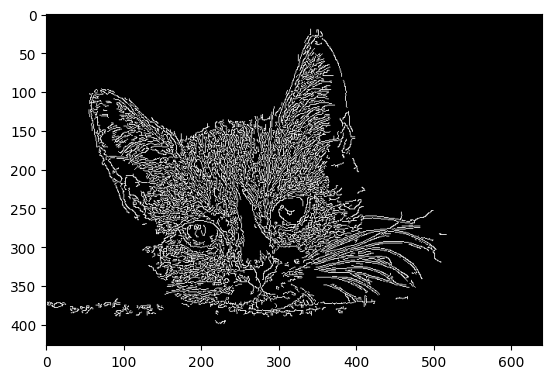

In [36]:
canny_image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
canny_image = cv2.Canny(canny_image,100,200)
plt.imshow(canny_image,cmap='gray')
plt.show()


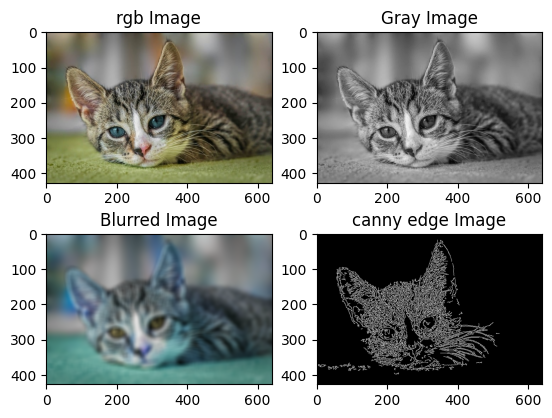

In [38]:
# put all 4 image together
fig, axs = plt.subplots(2,2)
axs[0,0].imshow(rgb_img)
axs[0,0].set_title('rgb Image')
axs[0,1].imshow(gray_img,cmap='gray')
axs[0,1].set_title('Gray Image')
axs[1,0].imshow(blurred_image)
axs[1,0].set_title('Blurred Image')
axs[1,1].imshow(canny_image,cmap='gray')
axs[1,1].set_title('canny edge Image')
plt.show()

## Face Recognition


In [ ]:
# build in opencv face recognition
cap = cv2.VideoCapture(0)
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
while True:
    ret, frame = cap.read()
    if not ret:
        print("cant not receive frame")
        break
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)
    for (x,y,w,h) in faces:
        cv2.rectangle(frame, (x,y), (x+w, y+h), (255,0,0), 2)
    cv2.imshow("frame",frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

## Color Detection

In [ ]:
# packgae box color coutning system
video_path = r"D:\Wetu_file\Teaching\Paragon\dataset\box6.mp4"
lower = np.array([5, 50, 50])
upper = np.array([15, 255, 255])
count = 0
flag = 0
cap = cv2.VideoCapture(video_path)
while True:
    ret, frame = cap.read()
    if not ret:
        print("cant not receive frame")
        break
    frame = cv2.resize(frame, (640, 480))
    roi = frame[350:450, 200:400]
    hsv = cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)
    mask = cv2.inRange(hsv, lower, upper)
    cv2.rectangle(frame, (200, 350), (400, 450), (0, 255, 0), 2)
    if np.mean(mask)>30:
        flag = 1
    if np.mean(mask)<=0.3 and flag == 1:
        count += 1
        flag = 0
    cv2.putText(frame, f"count: {count}", (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
    cv2.putText(frame, f"mean value: {np.mean(mask)}", (50, 100), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
    cv2.imshow("mask", mask)
    cv2.imshow("frame", frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

## Background Substraction

import cv2
import matplotlib.pyplot as plt
import numpy as np
vieo_path = r"D:\Wetu_file\Teaching\Paragon\dataset\mixer.mp4"
cap = cv2.VideoCapture(vieo_path)

_, frist_frame = cap.read()
# background substraction without knn
bg_subtractor = cv2.createBackgroundSubtractorMOG2(detectShadows=True)
bg_subtractor.apply(frist_frame)
while True:
    ret, frame = cap.read()
    if not ret:
        break
    fg_mask = bg_subtractor.apply(frame)
    # threshold
    _, fg_mask = cv2.threshold(fg_mask, 244, 255, cv2.THRESH_BINARY)
    print(np.mean(fg_mask))
    if np.mean(fg_mask) > 15:
        cv2.putText(frame, "movement detected", (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
    else:
        cv2.putText(frame, "no movement", (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
    cv2.imshow("frame", frame)
    cv2.imshow("fg_mask", fg_mask)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()
